In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay,
     roc_curve, RocCurveDisplay,f1_score
)
from sklearn import metrics
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [25]:
data = pd.read_csv('data/lending_club_loan_two.csv', error_bad_lines=False)

/var/folders/bj/1bm8_9hj23n5wy8n37g6dj_w0000gp/T/ipykernel_12964/307238160.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data/lending_club_loan_two.csv', error_bad_lines=False)


In [26]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [27]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [28]:
data.emp_title.nunique()
data.drop('emp_title', axis=1, inplace=True)
data.drop('emp_length', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)
data.drop('grade', axis=1, inplace=True)

In [29]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [30]:
data.dropna(inplace=True)
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [31]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status',
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [32]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)
data.drop('address', axis=1, inplace=True)
data.drop('issue_d', axis=1, inplace=True)

In [33]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [34]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [35]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
data.to_csv('dataset_xls.csv')

In [23]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Pycaret

In [ ]:
pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
s = ClassificationExperiment()
s = setup(data, target = 'loan_status', session_id = 123)

In [ ]:
best = s.compare_models()

In [ ]:
s.evaluate_model(best)

In [ ]:
evaluate_model(best)

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

## LIGHTGBM

In [15]:
# Convert the data to LightGBM format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set the model parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

y_pred = np.round(model.predict(X_test))


[LightGBM] [Info] Number of positive: 228913, number of negative: 57498
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2051
[LightGBM] [Info] Number of data points in the train set: 286411, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799247 -> initscore=1.381592
[LightGBM] [Info] Start training from score 1.381592


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8858


[[ 6650  7930]
 [  247 56776]]


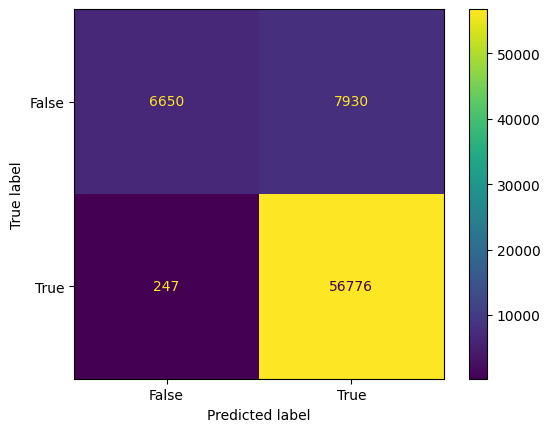

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [18]:
f1_score(y_test, y_pred, average='weighted')

0.8689784341627734

In [24]:
print_score(y_test, y_pred, train=True)

Train Result:
Accuracy Score: 88.58%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.964187      0.877446  0.885801      0.920817      0.895108
recall         0.456104      0.995668  0.885801      0.725886      0.885801
f1-score       0.619267      0.932826  0.885801      0.776047      0.868978
support    14580.000000  57023.000000  0.885801  71603.000000  71603.000000


## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_test_pred = rf_clf.predict(X_test)

print_score(y_test, y_test_pred, train=False)

Test Result:
Accuracy Score: 88.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.955497      0.877841  0.885344       0.916669       0.893580
recall         0.455502      0.994607  0.885344       0.725055       0.885344
f1-score       0.616912      0.932583  0.885344       0.774748       0.868605
support    23945.000000  94200.000000  0.885344  118145.000000  118145.000000
_______________________________________________
Confusion Matrix: 
 [[10907 13038]
 [  508 93692]]



[[10907 13038]
 [  508 93692]]


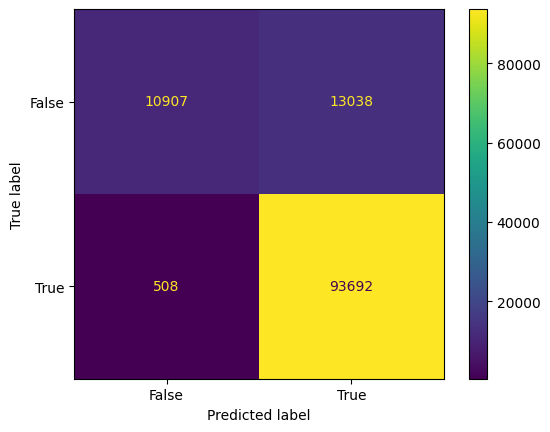

In [ ]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
cm_display.plot()
plt.show()

## Deep Learning

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import numpy as np
from sklearn.metrics import confusion_matrix

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [26]:
X_train1 = np.array(X_train).astype(np.float32)
X_test1 = np.array(X_test).astype(np.float32)
y_train1 = np.array(y_train).astype(np.float32)
y_test1 = np.array(y_test).astype(np.float32)

In [27]:
def dnn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model



In [30]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


dnn_model = dnn_model(
    num_columns=num_columns,
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)


In [31]:
r = dnn_model.fit(
    X_train1, y_train1,
    validation_data=(X_test1, y_test1),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8951/8951 [==============================] - 46s 5ms/step - loss: 0.3109 - AUC: 0.8605 - val_loss: 0.2731 - val_AUC: 0.8980
Epoch 2/20
8951/8951 [==============================] - 46s 5ms/step - loss: 0.2937 - AUC: 0.8783 - val_loss: 0.2669 - val_AUC: 0.9039
Epoch 3/20
8951/8951 [==============================] - 46s 5ms/step - loss: 0.2881 - AUC: 0.8833 - val_loss: 0.2688 - val_AUC: 0.9031
Epoch 4/20
8951/8951 [==============================] - 46s 5ms/step - loss: 0.2850 - AUC: 0.8862 - val_loss: 0.2661 - val_AUC: 0.9047
Epoch 5/20
8951/8951 [==============================] - 43s 5ms/step - loss: 0.2831 - AUC: 0.8883 - val_loss: 0.2646 - val_AUC: 0.9050
Epoch 6/20
8951/8951 [==============================] - 43s 5ms/step - loss: 0.2825 - AUC: 0.8890 - val_loss: 0.2647 - val_AUC: 0.9049
Epoch 7/20
8951/8951 [==============================] - 45s 5ms/step - loss: 0.2810 - AUC: 0.8900 - val_loss: 0.2645 - val_AUC: 0.9047
Epoch 8/20
8951/8951 [==============================] -

In [32]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

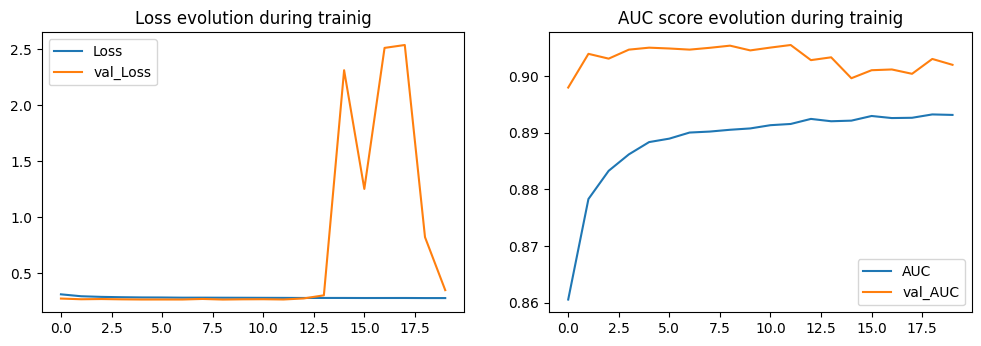

In [33]:
plot_learning_evolution(r)

In [5]:
import pickle

In [38]:
pickle.dump(dnn_model, open('dl_model.pkl','wb'))

In [20]:
x = [[0.5147435665130615, 1.0, 0.4885079860687256, 0.3385487198829651, 0.0055130706168711185, 0.0016901689814403653, 0.6521739363670349, 0.08988764137029648, 0.0, 0.015322962775826454,
 0.040008965879678726, 0.16107381880283356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 
 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]

In [22]:
dnn_data = pickle.load(open('dnn_model.pkl', 'rb'))

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
result = dnn_data.predict(x)

print(result)